In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importing libraries

In [2]:
file_name = "Flight_Ticket_Participant_Datasets/Data_Train.xlsx"
data = pd.read_excel(file_name, sheet_name="Sheet1")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Importing the dataset

## Data Analysis

In [3]:
for i in data.columns:
    print(data[i].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'

In [4]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We can see that there is minimal missing data present in the dataset.

In [5]:
data.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

We can see that columns - Airline, Source, Destination, Total_Stops, Additional_Info has nominal data which can be transformed using label encoder.

In [6]:
data.dropna(inplace=True)

We will drop all the missing value since we have a large dataset.

In [7]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Feature Engineering 

In [8]:
data["Route"][0].split()

['BLR', '→', 'DEL']

In [ ]:
routes = data["Route"]
route_count = []
for i in routes:
    l = len(i.split())
    route_count.append((l//2)+1)
route_count

In [ ]:
data["Route"] = route_count

We can see that column Route has a peculiar data and to make some use of this information we can count the number of locations in the Route feature

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
column_list = ["Airline","Source","Destination","Total_Stops","Additional_Info"]

In [12]:
data_le = data.copy()
for column in column_list:
    flag = False
    if data_le[column].isnull().sum() > 0:
        flag = True
    data_le[column] = le.fit_transform(data_le[column])
    if flag == True:
        data_le = data_le[data_le[column]<data_le[column].nunique()-1]
data_le

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,4,8,3897
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,1,8,7662
2,4,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,1,8,13882
3,3,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,0,8,6218
4,3,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,0,8,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9/04/2019,3,0,CCU → BLR,19:55,22:25,2h 30m,4,8,4107
10679,1,27/04/2019,3,0,CCU → BLR,20:45,23:20,2h 35m,4,8,4145
10680,4,27/04/2019,0,2,BLR → DEL,08:20,11:20,3h,4,8,7229
10681,10,01/03/2019,0,5,BLR → DEL,11:30,14:10,2h 40m,4,8,12648


Encoding categorical data inside categorical columns as identified earlier

In [13]:
data = data_le

In [16]:
from datetime import date, datetime
d = date.today()
datetime.strptime(d.strftime('%Y%m%d'), '%Y%m%d')

datetime.datetime(2021, 11, 12, 0, 0)

In [17]:
doj = []
for i in data["Date_of_Journey"]:
        i = (datetime.strptime(i,'%d/%m/%Y'))
        doj.append(i.toordinal())
doj

[737142,
 737180,
 737219,
 737191,
 737119,
 737234,
 737130,
 737119,
 737130,
 737206,
 737211,
 737167,
 737234,
 737188,
 737173,
 737121,
 737164,
 737222,
 737222,
 737206,
 737124,
 737139,
 737152,
 737180,
 737185,
 737219,
 737211,
 737194,
 737228,
 737225,
 737228,
 737180,
 737155,
 737225,
 737197,
 737237,
 737200,
 737197,
 737124,
 737213,
 737200,
 737133,
 737197,
 737185,
 737139,
 737142,
 737206,
 737182,
 737194,
 737237,
 737127,
 737180,
 737142,
 737228,
 737152,
 737142,
 737119,
 737124,
 737185,
 737124,
 737216,
 737152,
 737213,
 737194,
 737203,
 737234,
 737173,
 737185,
 737200,
 737130,
 737211,
 737127,
 737234,
 737234,
 737139,
 737127,
 737152,
 737152,
 737225,
 737139,
 737219,
 737142,
 737185,
 737237,
 737197,
 737124,
 737234,
 737216,
 737150,
 737203,
 737206,
 737124,
 737130,
 737124,
 737170,
 737231,
 737194,
 737213,
 737228,
 737222,
 737194,
 737219,
 737234,
 737191,
 737180,
 737197,
 737145,
 737145,
 737188,
 737203,
 737136,
 

In [18]:
data["Date_of_Journey"] = doj

Transforming date from string to datetime to numerical to be used in the model

In [19]:
duration_min= []
for i in data["Duration"]:
    time = i.split()
    duration = 0
    for i in range(len(time)):
        temp = time[i]
        time[i] = temp[:len(time[i])-1]
    duration = int(time[0])*60
    if len(time)>1:
        duration += int(time[1])
    duration_min.append(duration)
duration_min

[170,
 445,
 1140,
 325,
 285,
 145,
 930,
 1265,
 1530,
 470,
 795,
 155,
 135,
 730,
 155,
 1595,
 270,
 1355,
 1380,
 1235,
 310,
 920,
 170,
 175,
 800,
 910,
 345,
 355,
 170,
 135,
 135,
 805,
 170,
 1320,
 330,
 625,
 315,
 150,
 375,
 715,
 665,
 510,
 1325,
 165,
 720,
 170,
 170,
 135,
 965,
 1195,
 195,
 1520,
 170,
 180,
 170,
 975,
 905,
 135,
 390,
 1505,
 745,
 1640,
 615,
 630,
 135,
 625,
 170,
 90,
 800,
 135,
 85,
 1590,
 440,
 810,
 300,
 165,
 170,
 90,
 1145,
 135,
 890,
 160,
 1330,
 575,
 600,
 1280,
 325,
 1125,
 740,
 1080,
 555,
 665,
 1050,
 800,
 155,
 145,
 160,
 180,
 85,
 995,
 740,
 735,
 450,
 1440,
 165,
 535,
 430,
 870,
 1820,
 1195,
 900,
 175,
 765,
 610,
 355,
 925,
 965,
 610,
 160,
 715,
 160,
 85,
 845,
 1215,
 145,
 1390,
 1090,
 960,
 170,
 140,
 480,
 1015,
 190,
 165,
 840,
 1430,
 1300,
 1275,
 165,
 650,
 480,
 495,
 325,
 515,
 710,
 1655,
 505,
 1255,
 290,
 490,
 140,
 1465,
 170,
 740,
 735,
 1415,
 995,
 170,
 1545,
 1570,
 1730,
 1

In [20]:
data["Duration"] = duration_min

Transforming the duration of a flight into minutes

In [21]:
dep_time= []
for i in data["Dep_Time"]:
    time = i.split(":")
    time_min = int(time[0])*60 + int(time[1])
    dep_time.append(time_min)
dep_time

[1340,
 350,
 565,
 1085,
 1010,
 540,
 1135,
 480,
 535,
 685,
 585,
 1220,
 700,
 1270,
 1035,
 1000,
 525,
 840,
 1215,
 960,
 850,
 1320,
 240,
 1135,
 1135,
 1285,
 1310,
 420,
 585,
 425,
 425,
 590,
 240,
 875,
 425,
 635,
 905,
 855,
 420,
 425,
 425,
 405,
 1255,
 670,
 540,
 345,
 240,
 700,
 1140,
 1385,
 660,
 575,
 1340,
 1275,
 1435,
 1185,
 530,
 425,
 1140,
 940,
 565,
 365,
 525,
 900,
 425,
 635,
 585,
 835,
 355,
 800,
 425,
 345,
 700,
 1385,
 305,
 590,
 700,
 385,
 1050,
 500,
 1270,
 1195,
 390,
 685,
 540,
 845,
 120,
 580,
 505,
 1225,
 795,
 135,
 1015,
 355,
 1245,
 315,
 355,
 1190,
 425,
 1200,
 505,
 1200,
 1255,
 875,
 370,
 1170,
 700,
 285,
 775,
 1385,
 845,
 1135,
 1220,
 1095,
 420,
 425,
 1040,
 925,
 420,
 425,
 355,
 900,
 1200,
 1380,
 315,
 720,
 845,
 1200,
 240,
 885,
 710,
 690,
 880,
 1225,
 690,
 1150,
 405,
 1320,
 360,
 480,
 1050,
 1410,
 120,
 455,
 785,
 1200,
 1200,
 750,
 910,
 770,
 1340,
 1105,
 700,
 505,
 1200,
 500,
 1200,
 1135

In [22]:
data["Dep_Time"] = dep_time

Transforming the Depature time of a flight into numerical values that represent the depature time in minutes

In [23]:
i=0
n = len(data["Arrival_Time"])
while(i<n):
    if len(data["Arrival_Time"].iloc[i].split())>1:
        dt = datetime.strptime(data["Arrival_Time"].iloc[i]+" 2019",'%H:%M %d %b %Y')
        x=dt.toordinal()
        if x<data["Date_of_Journey"].iloc[i]:
            data = data.drop(i)
            data = data.reset_index(drop=True)
            n = len(data["Arrival_Time"])
        else:
            i+=1
    else:
#        temp1 = data["Arrival_Time"].iloc[i]
#        time_min = int(temp1[0])*60+int(temp1[1])
#        data["Arrival_Time"].iloc[i] = time_min
        i+=1

In [24]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,1,737180,3,0,4,350,13:15,445,1,8,7662
1,4,737219,2,1,4,565,04:25 10 Jun,1140,1,8,13882
2,3,737191,3,0,3,1085,23:30,325,0,8,6218
3,3,737119,0,5,3,1010,21:35,285,0,8,13302
4,8,737234,3,0,2,540,11:25,145,4,8,3873
...,...,...,...,...,...,...,...,...,...,...,...
10588,0,737158,3,0,2,1195,22:25,150,4,8,4107
10589,1,737176,3,0,2,1245,23:20,155,4,8,4145
10590,4,737176,0,2,2,500,11:20,180,4,8,7229
10591,10,737119,0,5,2,690,14:10,160,4,8,12648


In [25]:
arr_time= []
for i in data["Arrival_Time"]:
    time = i.split()
    time1 = time[0].split(":")
    time_min = int(time1[0])*60 + int(time1[1])
    arr_time.append(time_min)
arr_time

[795,
 265,
 1410,
 1295,
 685,
 625,
 305,
 625,
 1155,
 1380,
 1375,
 835,
 560,
 1190,
 1155,
 795,
 755,
 1155,
 755,
 1160,
 410,
 1310,
 495,
 755,
 215,
 775,
 755,
 560,
 560,
 1395,
 410,
 755,
 755,
 1260,
 1220,
 1005,
 795,
 1140,
 1090,
 915,
 1140,
 835,
 1260,
 515,
 410,
 835,
 665,
 1140,
 855,
 655,
 70,
 15,
 165,
 720,
 1435,
 560,
 90,
 1005,
 1310,
 565,
 1140,
 90,
 560,
 1260,
 755,
 925,
 1155,
 935,
 510,
 495,
 1140,
 755,
 605,
 755,
 870,
 475,
 755,
 635,
 720,
 1355,
 280,
 1260,
 1140,
 685,
 445,
 265,
 1245,
 865,
 1350,
 800,
 625,
 1155,
 1400,
 460,
 515,
 1370,
 510,
 755,
 1245,
 495,
 265,
 875,
 535,
 265,
 1130,
 1155,
 1155,
 1140,
 1310,
 545,
 265,
 775,
 1350,
 565,
 95,
 580,
 1140,
 515,
 985,
 605,
 1155,
 460,
 670,
 495,
 720,
 410,
 1025,
 1190,
 265,
 1070,
 1390,
 90,
 1140,
 265,
 1155,
 525,
 1130,
 90,
 465,
 445,
 970,
 55,
 1415,
 265,
 565,
 1200,
 1260,
 40,
 1130,
 870,
 1245,
 495,
 475,
 755,
 1305,
 1095,
 265,
 865,
 205

In [26]:
data["Arrival_Time"] = arr_time

## Univariate

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


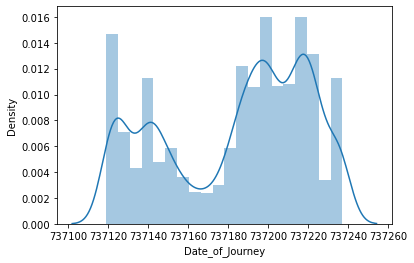

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


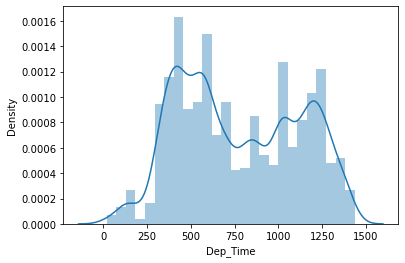

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


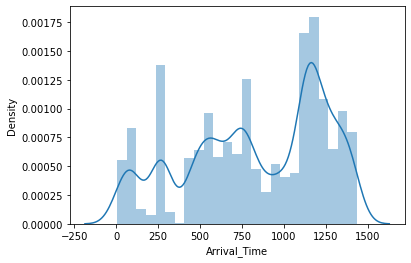

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


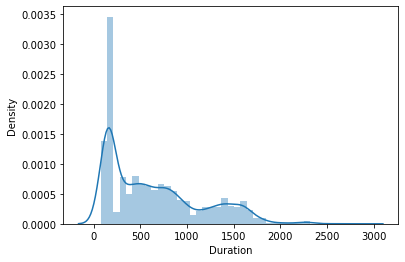

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


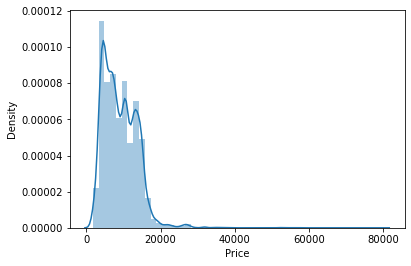

In [27]:
column_list = ["Date_of_Journey","Dep_Time","Arrival_Time","Duration","Price"]
for column in column_list:
    sns.distplot(data[column])
    plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


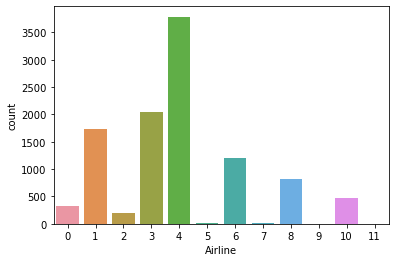

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


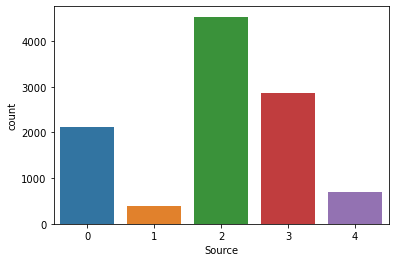

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


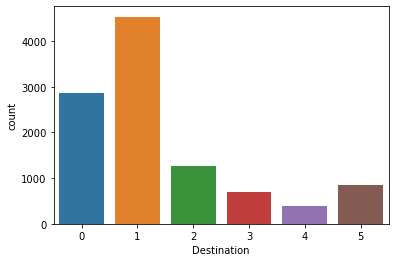

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


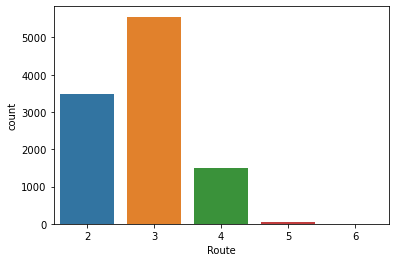

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


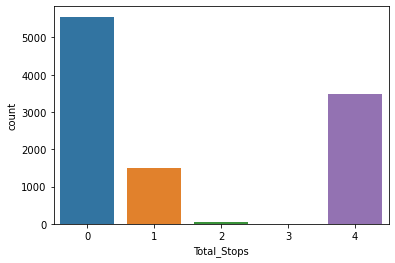

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


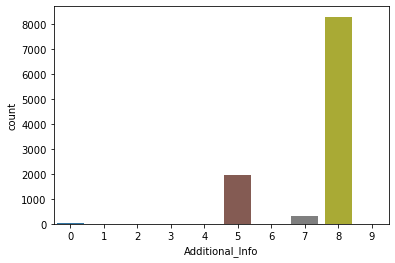

In [28]:
column_list_cat = ["Airline","Source","Destination","Route","Total_Stops","Additional_Info"]
for column in column_list_cat:
    sns.countplot(data[column])
    plt.show()

We can see some amount of skewness in our features and we cannot get rid of them since it might result in loss of information

## Bivariate

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


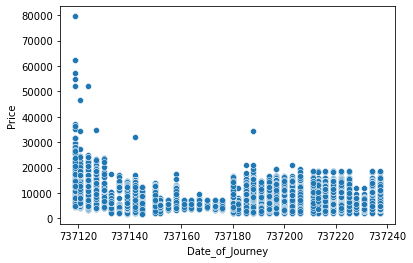

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


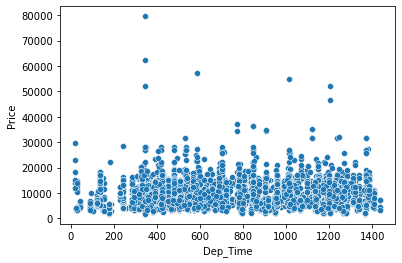

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


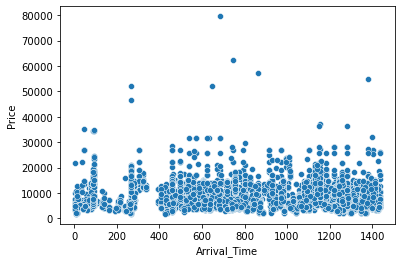

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


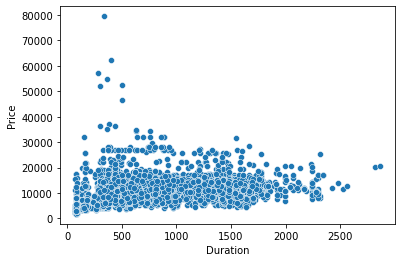

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


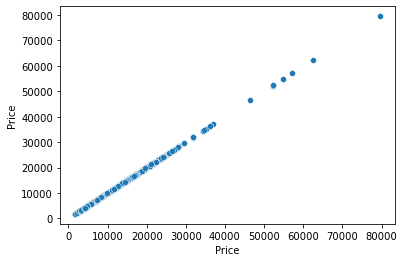

In [30]:
for column in column_list:
    sns.scatterplot(data[column],data["Price"])
    plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


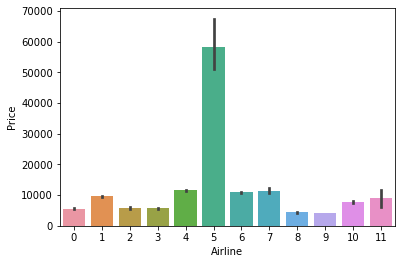

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


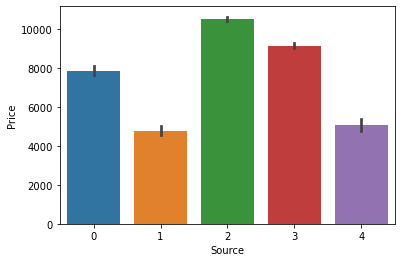

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


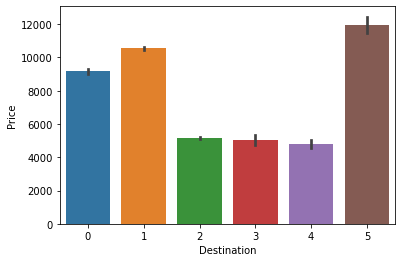

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


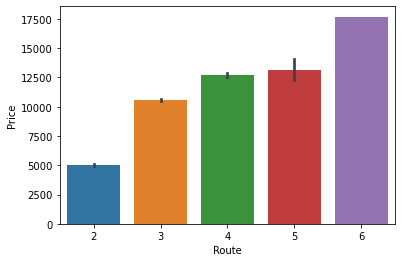

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


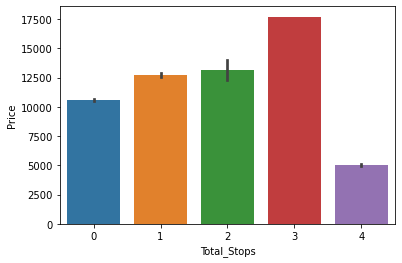

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


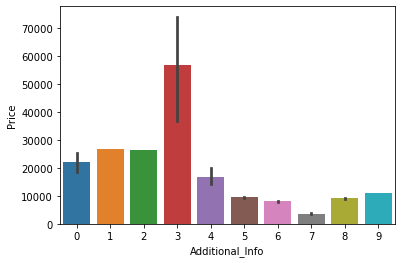

In [31]:
for column in column_list_cat:
    sns.barplot(data[column],data["Price"])
    plt.show()

We observe the variation in price range is uniform for all the features except in feature Airline where we can see that category 5 airlines have tickets of prices higher than 20,000

In [32]:
corr_matrix = data.corr()
corr_matrix

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.028199,-0.017276,0.023833,-0.197419,-0.039353,-0.009384,-0.156607,0.034626,-0.060290,-0.040295
Date_of_Journey,0.028199,1.000000,0.165916,-0.352490,0.054453,0.042638,-0.016462,0.016169,-0.024355,-0.060843,-0.135607
Source,-0.017276,0.165916,1.000000,-0.580442,0.200423,0.064947,0.018005,0.175124,-0.237104,-0.030620,0.023649
Destination,0.023833,-0.352490,-0.580442,1.000000,-0.310313,-0.080620,-0.026261,-0.280074,0.358908,0.039439,-0.084002
Route,-0.197419,0.054453,0.200423,-0.310313,1.000000,-0.061054,0.033125,0.738465,-0.731212,-0.082243,0.610937
Dep_Time,-0.039353,0.042638,0.064947,-0.080620,-0.061054,1.000000,0.015284,0.003629,0.043940,-0.049904,0.001347
Arrival_Time,-0.009384,-0.016462,0.018005,-0.026261,0.033125,0.015284,1.000000,0.048603,-0.091542,0.025679,0.026357
Duration,-0.156607,0.016169,0.175124,-0.280074,0.738465,0.003629,0.048603,1.000000,-0.602767,-0.166332,0.516887
Total_Stops,0.034626,-0.024355,-0.237104,0.358908,-0.731212,0.043940,-0.091542,-0.602767,1.000000,0.160866,-0.576225
Additional_Info,-0.060290,-0.060843,-0.030620,0.039439,-0.082243,-0.049904,0.025679,-0.166332,0.160866,1.000000,-0.068973


<AxesSubplot:>

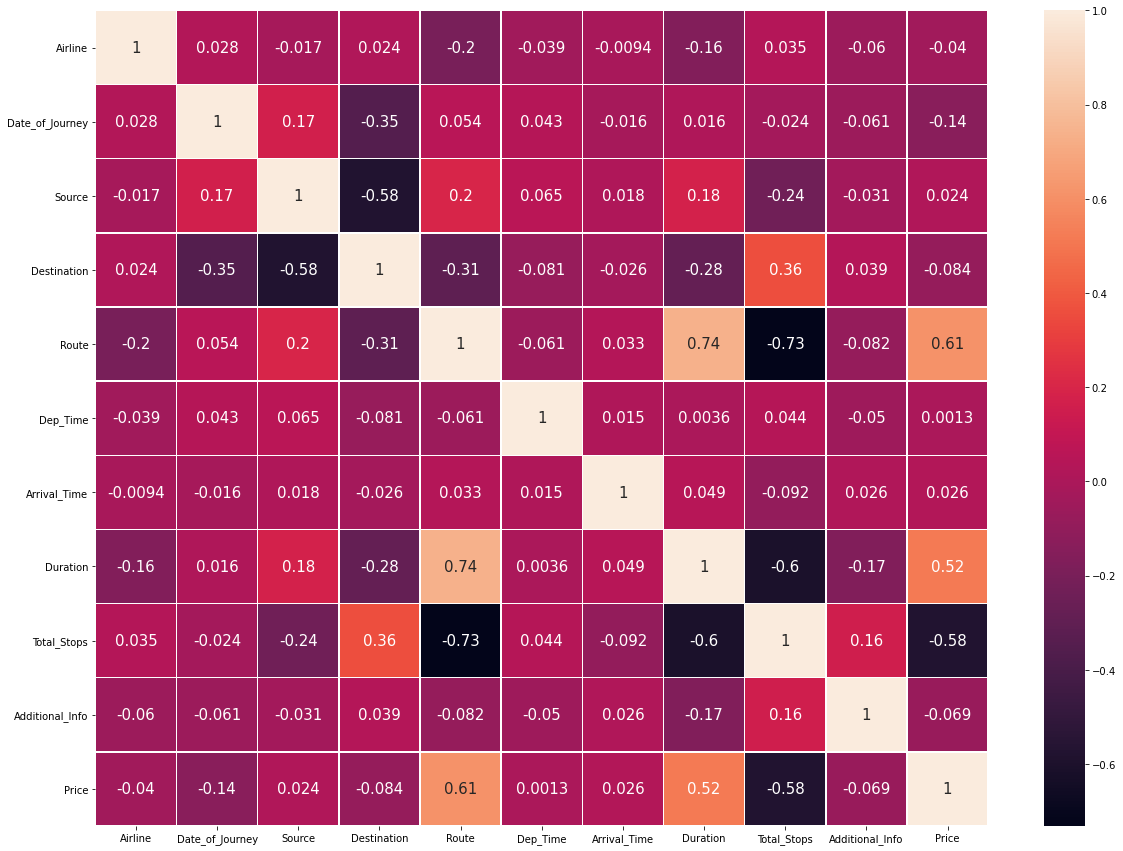

In [33]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,annot_kws={'size': 15})

We get high colinearity values for Route and Duration features. Also feature Total_Stops has negative colinearity but it won't cause any multicolinearity and might be useful for our model.

We will drop features "Route" and "Duration" due to high multicolinearity

In [305]:
data = data.drop(["Route","Duration"],axis=1)

Importing test data from dataset folder

In [306]:
file_name = file_name = "Flight_Ticket_Participant_Datasets/Test_set.xlsx"
data_test = pd.read_excel(file_name, sheet_name="Sheet1")
data_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [307]:
data_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [308]:
column_list = ["Airline","Source","Destination","Total_Stops","Additional_Info"]

In [309]:
data_test_le = data_test.copy()
for column in column_list:
    data_test_le[column] = le.fit_transform(data_test_le[column])
data_test_le


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,6/06/2019,2,1,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,0,5
1,3,12/05/2019,3,0,CCU → MAA → BLR,06:20,10:20,4h,0,5
2,4,21/05/2019,2,1,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,0,3
3,6,21/05/2019,2,1,DEL → BOM → COK,08:00,21:00,13h,0,5
4,0,24/06/2019,0,2,BLR → DEL,23:55,02:45 25 Jun,2h 50m,4,5
...,...,...,...,...,...,...,...,...,...,...
2666,1,6/06/2019,3,0,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,0,5
2667,3,27/03/2019,3,0,CCU → BLR,14:20,16:55,2h 35m,4,5
2668,4,6/03/2019,2,1,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,0,5
2669,1,6/03/2019,2,1,DEL → BOM → COK,04:00,19:15,15h 15m,0,5


In [310]:
data_test = data_test_le.drop(["Route","Duration"],axis=1)

In [311]:
doj = []
for i in data_test["Date_of_Journey"]:
        i = (datetime.strptime(i,'%d/%m/%Y'))
        doj.append(i.toordinal())
doj

[737216,
 737191,
 737200,
 737200,
 737234,
 737222,
 737130,
 737180,
 737133,
 737197,
 737139,
 737225,
 737194,
 737130,
 737213,
 737124,
 737216,
 737142,
 737222,
 737130,
 737124,
 737188,
 737136,
 737188,
 737155,
 737139,
 737194,
 737200,
 737216,
 737211,
 737121,
 737145,
 737225,
 737222,
 737133,
 737225,
 737136,
 737124,
 737188,
 737194,
 737191,
 737194,
 737219,
 737225,
 737180,
 737142,
 737121,
 737182,
 737150,
 737213,
 737191,
 737150,
 737142,
 737136,
 737228,
 737164,
 737197,
 737139,
 737219,
 737185,
 737222,
 737127,
 737152,
 737237,
 737142,
 737188,
 737216,
 737225,
 737222,
 737139,
 737228,
 737197,
 737150,
 737194,
 737197,
 737200,
 737231,
 737180,
 737121,
 737197,
 737234,
 737219,
 737197,
 737170,
 737188,
 737194,
 737139,
 737225,
 737167,
 737188,
 737197,
 737197,
 737234,
 737211,
 737237,
 737194,
 737225,
 737234,
 737142,
 737188,
 737124,
 737200,
 737127,
 737188,
 737133,
 737222,
 737188,
 737124,
 737127,
 737197,
 737124,
 

In [312]:
data_test["Date_of_Journey"] = doj

In [313]:
dep_time= []
for i in data_test["Dep_Time"]:
    time = i.split(":")
    time_min = int(time[0])*60 + int(time[1])
    dep_time.append(time_min)
dep_time

[1050,
 380,
 1155,
 480,
 1435,
 1095,
 450,
 915,
 610,
 990,
 835,
 410,
 540,
 345,
 1155,
 1285,
 795,
 595,
 1155,
 1375,
 645,
 1200,
 1285,
 330,
 1265,
 960,
 915,
 1050,
 540,
 840,
 1370,
 835,
 330,
 1190,
 430,
 355,
 430,
 1015,
 1135,
 620,
 1030,
 780,
 1365,
 480,
 1260,
 1065,
 1155,
 835,
 1135,
 450,
 565,
 845,
 835,
 345,
 585,
 915,
 120,
 700,
 410,
 1020,
 360,
 425,
 120,
 1005,
 1180,
 780,
 120,
 230,
 1275,
 690,
 720,
 1310,
 350,
 475,
 550,
 500,
 570,
 600,
 895,
 1200,
 1330,
 1020,
 420,
 1195,
 915,
 700,
 500,
 425,
 1030,
 1135,
 845,
 845,
 960,
 1200,
 1170,
 380,
 900,
 780,
 345,
 500,
 335,
 600,
 1065,
 400,
 1035,
 1135,
 1280,
 345,
 455,
 400,
 540,
 690,
 415,
 1055,
 675,
 1215,
 480,
 1225,
 340,
 620,
 1005,
 1375,
 690,
 360,
 905,
 1255,
 865,
 1020,
 410,
 780,
 1185,
 410,
 1310,
 915,
 600,
 505,
 600,
 570,
 1170,
 1320,
 360,
 1270,
 135,
 845,
 510,
 1240,
 1275,
 855,
 990,
 585,
 505,
 875,
 840,
 670,
 1030,
 1270,
 1035,
 1

In [314]:
data_test["Dep_Time"] = dep_time

In [315]:
arr_time= []
for i in data_test["Arrival_Time"]:
    time = i.split()
    time1 = time[0].split(":")
    time_min = int(time1[0])*60 + int(time1[1])
    arr_time.append(time_min)
arr_time

[265,
 620,
 1140,
 1260,
 165,
 755,
 1355,
 1230,
 775,
 1355,
 1130,
 970,
 1155,
 625,
 755,
 495,
 1350,
 1330,
 265,
 495,
 95,
 605,
 540,
 1140,
 1435,
 265,
 1065,
 1140,
 265,
 1260,
 80,
 95,
 755,
 1370,
 515,
 515,
 515,
 1380,
 720,
 1260,
 1180,
 90,
 15,
 460,
 135,
 1205,
 1130,
 925,
 1355,
 1260,
 825,
 1190,
 980,
 685,
 720,
 1090,
 465,
 1150,
 730,
 1130,
 1155,
 565,
 465,
 1345,
 1340,
 950,
 445,
 755,
 15,
 1130,
 810,
 1140,
 1310,
 945,
 640,
 680,
 740,
 325,
 1070,
 605,
 60,
 545,
 775,
 1345,
 90,
 90,
 635,
 1140,
 1180,
 495,
 495,
 1095,
 1260,
 1155,
 1245,
 460,
 265,
 1155,
 425,
 1110,
 610,
 1260,
 95,
 1140,
 1185,
 605,
 1370,
 45,
 1280,
 1140,
 1130,
 95,
 570,
 1335,
 1110,
 1155,
 1105,
 90,
 265,
 1140,
 1225,
 625,
 845,
 525,
 1220,
 755,
 1015,
 1175,
 970,
 950,
 265,
 730,
 215,
 1065,
 765,
 980,
 325,
 740,
 1335,
 650,
 525,
 1355,
 755,
 1355,
 690,
 565,
 15,
 1005,
 280,
 495,
 980,
 1340,
 1260,
 845,
 1180,
 5,
 1195,
 1370,


In [316]:
data_test["Arrival_Time"] = arr_time

In [317]:
data_test

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info
0,4,737216,2,1,1050,265,0,5
1,3,737191,3,0,380,620,0,5
2,4,737200,2,1,1155,1140,0,3
3,6,737200,2,1,480,1260,0,5
4,0,737234,0,2,1435,165,4,5
...,...,...,...,...,...,...,...,...
2666,1,737216,3,0,1230,1225,0,5
2667,3,737145,3,0,860,1015,4,5
2668,4,737124,2,1,1310,265,0,5
2669,1,737124,2,1,240,1155,0,5


After all the transformation we made for the training dataset to the test dataset we get the above data as our test dataset

## Standard Scaler

In [318]:
from sklearn.preprocessing import MinMaxScaler

In [319]:
scaler = MinMaxScaler()

In [320]:
X = data.drop(["Price"],axis=1)
y = data["Price"]

In [323]:
column_list_sca = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']
column_list_sca

['Date_of_Journey', 'Dep_Time', 'Arrival_Time']

In [324]:
X[column_list_sca] = scaler.fit_transform(X[column_list_sca])
X[column_list_sca] = pd.DataFrame(X[column_list_sca],columns=column_list_sca)
X

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info
0,1,0.516949,3,0,0.233216,0.552448,1,8
1,4,0.847458,2,1,0.385159,0.181818,1,8
2,3,0.610169,3,0,0.752650,0.982517,0,8
3,3,0.000000,0,5,0.699647,0.902098,0,8
4,8,0.974576,3,0,0.367491,0.475524,4,8
...,...,...,...,...,...,...,...,...
10588,0,0.330508,3,0,0.830389,0.937063,4,8
10589,1,0.483051,3,0,0.865724,0.975524,4,8
10590,4,0.483051,0,2,0.339223,0.472028,4,8
10591,10,0.000000,0,5,0.473498,0.590909,4,8


## Training and Testing split pipeline

In [325]:
from sklearn.model_selection import train_test_split

In [326]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

### Linear Regression Model

In [327]:
from sklearn.linear_model import LinearRegression

In [328]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [329]:
print(lr.score(X_train,y_train))
lr.score(X_test,y_test)

0.3689168165529779


0.36408994836306174

In [330]:
y_pred = lr.predict(X_test)
y_pred

array([11234.20635046, 10877.46747811, 11528.67087687, ...,
        3635.87491477, 12117.49799192, 10092.56855183])

In [331]:
y_test

8099     14388
9689     10624
1793     13977
7386     15292
10568     9663
         ...  
1741      7870
1658      4804
212       4995
6037     14871
2620      6007
Name: Price, Length: 2119, dtype: int64

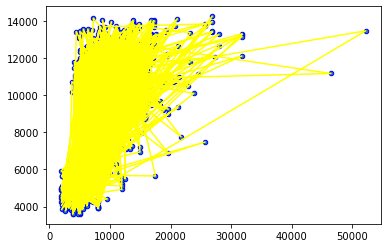

In [332]:
plt.scatter(y_test, y_pred, edgecolor='b',s=20, label="Samples")
plt.plot(y_test, y_pred,color = 'yellow', label="Model")

plt.show()

In [333]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

3597.494302959259

In [334]:
from sklearn.model_selection import KFold,cross_val_score

In [335]:
scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=3)
scores

array([0.36923595, 0.37280338, 0.35701189])

In [336]:
print(np.mean(scores),np.std(scores))

0.36635040679043035 0.006762026250380065


In [337]:
from sklearn.metrics import r2_score

In [338]:
r2_score(y_test,y_pred)

0.36408994836306174

### Decision Tree Regression Model

In [339]:
from sklearn.tree import DecisionTreeRegressor

In [340]:
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    DTR = DecisionTreeRegressor()
    DTR.fit(X_train, y_train)
    r2 = DTR.score(X_test,y_test)
    if r2>score_max:
        score_max = r2
        index = i
print (score_max)
index

0.9122402433680046


61

In [341]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=index)

In [342]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [343]:
print(DTR.score(X_train,y_train))
DTR.score(X_test,y_test)

0.996304667444125


0.9004310227572299

In [344]:
y_pred = DTR.predict(X_test)

In [345]:
y_pred = DTR.predict(X_test)
y_pred

array([ 7229., 17049.,  4668., ...,  6628.,  4049.,  3625.])

In [346]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

1455.9148043026614

In [347]:
r2_score(y_test,y_pred)

0.9004310227572299

In [348]:
scores = cross_val_score(DTR, X_train, y_train, scoring='r2',cv=3)
scores

array([0.81190583, 0.81701392, 0.80208777])

In [349]:
print(np.mean(scores),np.std(scores))

0.8103358410141106 0.006193877667492849


### Random Forest Regressor

In [350]:
from sklearn.ensemble import RandomForestRegressor

In [351]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=89)

In [352]:
rfr = RandomForestRegressor(max_depth=10)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

In [353]:
y_pred = rfr.predict(X_test)
y_pred

array([ 9115.23190621,  9848.85413647, 10216.46579189, ...,
        7459.44391074,  5062.19796687, 10248.55780048])

In [354]:
print(rfr.score(X_train,y_train))
rfr.score(X_test,y_test)

0.9241739808702949


0.8926850790560499

In [355]:
r2 = r2_score(y_test,y_pred)
r2

0.8926850790560499

In [356]:
y_test

7696     8372
3476     9663
456      9736
108      5780
9455     4943
        ...  
4790    13044
1831     3342
478      6643
2898     4784
7357     7363
Name: Price, Length: 2119, dtype: int64

In [357]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

1448.7259990569178

In [377]:
scores = cross_val_score(rfr, X_train, y_train, scoring='r2',cv=3)
scores

array([0.83537198, 0.87037847, 0.88239516])

In [378]:
print(np.mean(scores),np.std(scores))

0.8627152017520444 0.019947250033024312


### Support Vector Regression

In [360]:
from sklearn.svm import SVR

In [361]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [362]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [363]:
y_pred = svr.predict(X_test)
y_pred

array([8600.04618113, 8601.49316118, 8548.44924832, ..., 7774.02416254,
       8523.3900155 , 8555.74153431])

In [364]:
r2 = svr.score(X_test,y_test)
r2

0.050271617119514556

In [365]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

4396.448382144644

In [366]:
scores = cross_val_score(svr, X_train, y_train, scoring='r2', cv=3)
scores

array([0.01560418, 0.04797673, 0.02836653])

In [367]:
print(np.mean(scores),np.std(scores))

0.03064914775464267 0.013314235090900567


### KNN Regression

In [368]:
from sklearn.neighbors import KNeighborsRegressor


In [369]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=40)

In [370]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [371]:
y_pred = knn.predict(X_test)
y_pred

array([23935.2,  8710.2, 12688. , ...,  6216. ,  3841. ,  7941.2])

In [372]:
print(knn.score(X_train,y_train))
knn.score(X_test,y_test)

0.8781379255599409


0.7953733526535041

In [373]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

2010.8184815394955

In [374]:
scores = cross_val_score(rfr, X_train, y_train, scoring='r2',cv=3)
scores

array([0.85384581, 0.86248762, 0.85178604])

In [375]:
print(np.mean(scores),np.std(scores))

0.8560398248439567 0.0046361745792811455


From the above models we can find the highest accuracy among these models. From our observation we can see that Random Forest Regression model has the highest score relative to other models. Also, the difference between mean scores and standard deviation is highest for Random Forest Regressoion

## Using hyperparameters on Random Forest Regression model to improve accuracy.

In [380]:
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)
    r2 = rfr.score(X_test,y_test)
    if r2>score_max:
        score_max = r2
        index = i
print (score_max)
index

0.9268573105066835


76

In [381]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [389]:
model_params = {'n_estimators': [20,40,60,80,100],
                'max_features': [5,7,9,11,13],
                'max_depth': [20,40,60,80,100],
                'random_state':[25,35,45,55,65,75,85]}

In [390]:
from sklearn.model_selection import GridSearchCV

In [391]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=index)

In [392]:
rfr = RandomForestRegressor()

In [393]:
k_fold = KFold(n_splits=4, shuffle=True, random_state=index)

In [394]:
rfr_grid = GridSearchCV(estimator=rfr, param_grid=model_params)
rfr_grid.fit(X_train, y_train)
print(rfr_grid.best_estimator_)

/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2625 fits failed out of a total of 4375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2625 fits failed with the following error:
Traceback (most recent call last):
  File "/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 442, in fit
    trees = Parallel(
  File "/home/osux/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/osux/anac

RandomForestRegressor(max_depth=40, max_features=5, n_estimators=40,
                      random_state=65)


In [395]:
rfr_final = RandomForestRegressor(max_depth=40, max_features=5, n_estimators=40,
                      random_state=65)

In [396]:
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    rfr_final.fit(X_train, y_train)
    score = rfr_final.score(X_test,y_test)
    if score>score_max:
        score_max = score
        index = i
print (score_max)
index

0.9288496051184894


41

In [397]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=index)

In [399]:
rfr_final.fit(X_train, y_train)

RandomForestRegressor(max_depth=40, max_features=5, n_estimators=40,
                      random_state=65)

In [400]:
y_pred = rfr_final.predict(X_test)
y_pred

array([13925.88333333,  7177.85      , 10834.8       , ...,
        4888.        , 12123.375     , 15913.5       ])

In [401]:
print(rfr_final.score(X_train,y_train))
rfr_final.score(X_test,y_test)

0.9789061949130486


0.9288496051184894

In [402]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

1252.7095004634564

In [403]:
scores = cross_val_score(rfr_final, X_train, y_train,cv=4)
scores

array([0.87886693, 0.91139423, 0.84998462, 0.85895753])

In [404]:
print(np.mean(scores),np.std(scores))

0.8748008269720355 0.02357151170948902


# Saving the most efficient model in a pickle file# Saving the most efficient model in a pickle file

In [164]:
import pickle

final_model1 = open('knn_final_prediction.csv', 'ab')     
pickle.dump(knn_final, final_model1)                     
final_model1.close() 

## Predicting prices from the test case data

In [165]:
data_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,737216,2,1,3,1050,265,655,0,5
1,3,737191,3,0,3,380,620,240,0,5
2,4,737200,2,1,3,1155,1140,1425,0,3
3,6,737200,2,1,3,480,1260,780,0,5
4,0,737234,0,2,2,1435,165,170,4,5
...,...,...,...,...,...,...,...,...,...,...
2643,1,737216,3,0,3,1230,1225,1435,0,5
2644,3,737145,3,0,2,860,1015,155,4,5
2645,4,737124,2,1,3,1310,265,395,0,5
2646,1,737124,2,1,3,240,1155,915,0,5


In [166]:
test_pred = knn_final.predict(data_test)
test_pred

array([10262. ,  9686.5, 10262. , ..., 10262. ,  9584.5,  6093. ])

In [168]:
sample_submission = pd.read_excel("Flight_Ticket_Participant_Datasets/Sample_submission.xlsx",sheet_name="Sheet1")
sample_submission

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544
